# 机器学习基础操作线性模型

在实验练习08中我们使用的数据为两个城市在不同因素影响下某小时共享单车租用的数量。现在我们利用该数据集构建一个回归预测模型，根据数据中的某些属性预测该时段内的单车租用数量，该表所有值均为整型数据，表结构为：

id 记录编号，无其他意义

city 城市代号，0为北京，1为上海

hour 小时，代表时间

is_workday 是否为工作日，0为否，1为是

temp_air 大气温度，单位为摄氏度

temp_body 体感温度，单位为摄氏度

weather 天气代号，1为晴天，2为多云或阴天，3为雨天或雪天

wind 风级，数值越大代表风速越大

y 该小时内共享单车被租用的数量

请完成以下任务

1. 数据集已上传至data文件夹中，具体文件为bike.csv。请使用pandas库读取该文件。

2. id属性对构建回归预测模型没有帮助，请剔除掉该列。

3. 我们暂不考虑不同城市对单车租用的影响，请筛选出上海市的所有数据，然后剔除city列。

4. 为简化数据，请将hour列中原来6点-18点统一为1；19点-次日5点统一为0。

5. y列为单车租用数量，是我们的预测目标（标签），请将该列提取出来，并转换为一个numpy列向量，将原先的y列剔除。

6. 请将DataFrame对象转换为Numpy数组，方便后续操作。

7. 请按照训练集与测试集8:2的比例将原始数据集划分。

8. 请分别对训练集数据、训练集标签、测试集数据和测试集标签进行归一化。

9. 请先构建一个线性回归模型（多元一次函数），然后利用训练集训练模型。

10. 利用测试集对训练好的模型进行评估。提示：使用predict(data_array)方法输入测试集，该函数返回值为模型预测值。

11. 模型评估：请使用均方根误差（RMSE）作为评估指标，并输出RMSE值。

In [55]:
import numpy as np
import pandas as pd
data=pd.read_csv("bike.csv")
data.drop('id',axis=1,inplace=True)
data=data[data['city']==1]
data.drop('city',axis=1,inplace=True)
mask=np.logical_and(data['hour']>=6,data['hour']<=18)
data.loc[mask,'hour']=1
data.loc[np.logical_not(mask),'hour']=0
y=np.array(data['y']).reshape(-1,1)
data.drop('y',axis=1,inplace=True)
X=np.array(data)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.preprocessing import MinMaxScaler
scaler_X=MinMaxScaler()
X_train=scaler_X.fit_transform(X_train)
X_test=scaler_X.transform(X_test)
scaler_y=MinMaxScaler()
y_train=scaler_y.fit_transform(y_train)
y_test=scaler_y.transform(y_test)

from sklearn.preprocessing import MinMaxScaler
scaler_X=MinMaxScaler()
X=scaler_X.fit_transform(X)
scaler_y=MinMaxScaler()
y=scaler_y.fit_transform(y)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

from sklearn.metrics import mean_squared_error
y_predict=model.predict(X_test)
RMSE=np.sqrt(mean_squared_error(y_test,y_predict))
print("RMSE:",RMSE)

RMSE: 0.1652799928539963


# 利用K近邻算法学习鸢尾花数据集


K近邻（K-Nearest Neighbors，简称KNN）算法是一种基本的分类和回归方法，也是监督学习中最简单、直观的方法之一。

该算法基于一个简单的思想：如果一个样本在特征空间中的k个最近邻居中的大多数属于某个类别，则该样本也属于这个类别。

利用鸢尾花数据集进行实验，鸢尾花数据集可以通过sklearn库导入

1. 加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
2. 以花萼长度为横轴，花萼宽度为纵轴绘制数据的散点图
3. 对鸢尾花数据的特征进行PCA降维，并且可视化降维后的结果，x轴为主成分1，y轴为主成分2
4. 以K=3训练分类器
5. 在测试集上进行测试，最后输出分类准确率

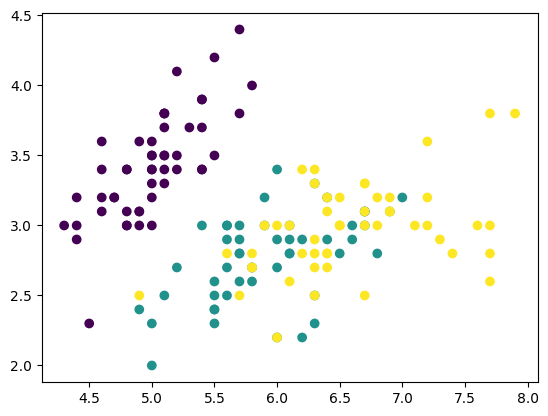

In [56]:
import matplotlib.pyplot as plt
from sklearn import datasets

iris=datasets.load_iris()
plt.scatter(iris['data'][:,0],iris['data'][:,1],c=iris["target"])
plt.show()


准确率: 1.0


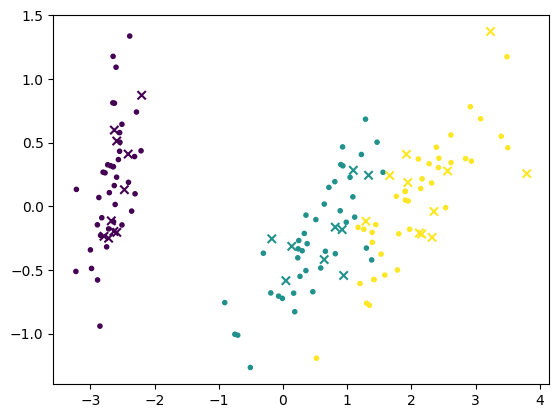

In [57]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier as KNN

pca=PCA(n_components=2)
data=pca.fit_transform(iris['data'])
target=iris['target']
data_train,data_test,target_train,target_test=train_test_split(data,target,test_size=0.2,random_state=42)
knn=KNN(3)
knn.fit(data_train,target_train)
print("准确率:",knn.score(data_test,target_test))

plt.scatter(data_train[:,0],data_train[:,1],c=target_train,marker='.')
plt.scatter(data_test[:,0],data_test[:,1],c=target_test,marker='x')
plt.show()